# Extraction des polygones des EPCI de la région AURA

## Objectifs

Pour faire des cartes on va avoir besoin du tracé des différentes entités administratives. Ce notebook s'occupe des départements. Il ouvre le shapefile, le filtre selon le code insee et en réécrit un qui (normalement!) ne contient que les données qui nous intéressent, simplifiées de sorte à convenir à un site web.



## Instructions

Données à récupérer:
- liste des communes par EPCI: https://www.collectivites-locales.gouv.fr/institutions/liste-et-composition-des-epci-fiscalite-propre, à convertir en csv (servira à sélectionner les epci de AURA)
- shapefile EPCI https://geoservices.ign.fr/adminexpress#telechargement. Copier les fichiers EPCI* davs un dossier ../data/epci-shp

## Notes

Pour simplifier l'implémentation de l'outil, j'ai renommé la colonne "CODE_SIRENE" du shapefile des EPCI "code_territoire" (colonne adéquate de DATA.xlsx)

In [1]:
import geopandas as gpd
import pandas as pd
import topojson as tp
import json
import re

In [2]:
with open("../data/epcicom2023.csv", encoding = "ISO-8859-1") as f:
    _ = f.readline()
    epci = f.readlines()
epci = [ c.split(";") for c in epci ]
depts_aura = ["01", "03", "07", "15", "26", "38", "42", "43", "63", "69", "73", "74"]
epci_to_keep = set([ k[1] for k in epci if k[0] in depts_aura ])

In [3]:
epci_fr = gpd.read_file("../data/epci-shp/EPCI.shp")

In [4]:
in_AURA = [ i for i in range(len(epci_fr))
               if epci_fr.iloc[i].CODE_SIREN in epci_to_keep ]

In [5]:
epci_aura = epci_fr.iloc[in_AURA]

<AxesSubplot:>

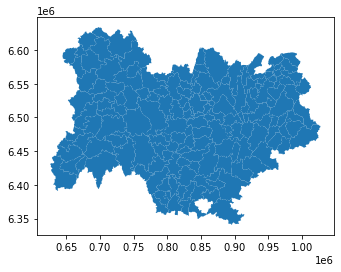

In [6]:
epci_aura.plot()

In [7]:
! mkdir -p ../data/epci_aura

In [8]:
topo = tp.Topology(epci_aura.to_crs(4326), prequantize=False)
epci_aura_simple = topo.toposimplify(0.01).to_gdf()
epci_aura_simple = epci_aura_simple.rename(columns={"CODE_SIREN": "code_territoire"})
epci_aura_simple = epci_aura_simple.drop(columns=["ID"])
epci_aura_simple.to_file("../data/epci_aura.geojson")

/home/thomas/.local/lib/python3.10/site-packages/topojson/core/dedup.py:107: RuntimeWarning: invalid value encountered in cast
  data["bookkeeping_shared_arcs"] = array_bk_sarcs.astype(np.int64).tolist()
